In [ ]:
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## Data Preperation Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
## Support Vector Machine Libraries
from sklearn import svm
## Decision Tree Libraries
from sklearn import tree
## Adaboost Libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
## Cross Validation Libraries 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
## Library for plotting
# import matplotlib.pyplot as plt
## Library for calculating performance metrics
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score,roc_curve, auc
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
import warnings
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import seaborn as sns
import os
import time
#Setting options
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

#Set Default option
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
pd.options.display.max_rows = 3000

In [ ]:
import pandas as pd
name = ['Temperature of patient', 'Occurrence of nausea', 'Lumbar pain', 'Urine pushing', 'Micturition pains',
       'Burning of urethra, itch, swelling of urethra outlet ', 'decision: Inflammation of urinary bladder',
       'decision: Nephritis of renal pelvis origin']
data = pd.read_csv('/content/grive/MyDrive/diagnosis (1).csv', names = name, skiprows=[0])
data.head()

,Temperature of patient,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,"Burning of urethra, itch, swelling of urethra outlet",decision: Inflammation of urinary bladder,decision: Nephritis of renal pelvis origin
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in data.columns[0:] :
    data[i] = le.fit_transform(data[i])

In [ ]:
data.head()

,Temperature of patient,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,"Burning of urethra, itch, swelling of urethra outlet",decision: Inflammation of urinary bladder,decision: Nephritis of renal pelvis origin
0,0,0,1,0,0,0,0,0
1,1,0,0,1,1,1,1,0
2,1,0,1,0,0,0,0,0
3,2,0,0,1,1,1,1,0
4,2,0,1,0,0,0,0,0


In [ ]:
data.isnull().sum()

Temperature of patient                                   0
Occurrence of nausea                                     0
Lumbar pain                                              0
Urine pushing                                            0
Micturition pains                                        0
Burning of urethra, itch, swelling of urethra outlet     0
decision: Inflammation of urinary bladder                0
decision: Nephritis of renal pelvis origin               0
dtype: int64

In [ ]:
sc = StandardScaler()

In [ ]:
credit_df=data

In [ ]:
df1=credit_df[credit_df['decision: Nephritis of renal pelvis origin']==0]
df2=credit_df[credit_df['decision: Nephritis of renal pelvis origin']==1]
frame=[df1,df2]
data=pd.concat(frame)

In [ ]:
data['decision: Nephritis of renal pelvis origin'].value_counts()

0    70
1    50
Name: decision: Nephritis of renal pelvis origin, dtype: int64

In [ ]:
X = data.drop(['decision: Nephritis of renal pelvis origin'],
          axis="columns")
X.head()

,Temperature of patient,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,"Burning of urethra, itch, swelling of urethra outlet",decision: Inflammation of urinary bladder
0,0,0,1,0,0,0,0
1,1,0,0,1,1,1,1
2,1,0,1,0,0,0,0
3,2,0,0,1,1,1,1
4,2,0,1,0,0,0,0


In [ ]:
y = data['decision: Nephritis of renal pelvis origin']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: decision: Nephritis of renal pelvis origin, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Scaling the independent features
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
print("Before OverSampling, counts of label '1':",(y_train == 1).sum()) 
print("Before OverSampling, counts of label '0':",(y_train == 0).sum())
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
#conda install -c conda-forge imbalanced-learn

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X:',X_train_res.shape) 
print('After OverSampling, the shape of train_y:', y_train_res.shape) 
  
print("After OverSampling, counts of label '1':",sum(y_train_res == 1)) 
print("After OverSampling, counts of label '0':",sum(y_train_res == 0))

Before OverSampling, counts of label '1': 36
Before OverSampling, counts of label '0': 48
After OverSampling, the shape of train_X: (96, 7)
After OverSampling, the shape of train_y: (96,)
After OverSampling, counts of label '1': 48
After OverSampling, counts of label '0': 48


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
def validation(clf,X_train, y_train):
    scores = cross_validate(clf, X_train, y_train,cv=8, return_train_score=True)
    return scores

In [ ]:
def roc_auc(yTest,y_pred):
#     sns.set()
    fpr, tpr, thresholds = roc_curve(yTest, y_pred)
    roc_auc = auc(fpr,tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.0])
    plt.ylim([-0.1,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [ ]:
model_linear = SVC(kernel='linear', C=0.01)
score_1_linear = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='linear', C=0.1)
score_2_linear = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='linear', C=0.5)
score_3_linear = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='linear', C=1)
score_4_linear = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='linear', C=5)
score_5_linear = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='linear', C=10)
score_6_linear = validation(model_linear, X_train, y_train)

In [ ]:
score_1_linear=pd.DataFrame.from_dict(score_1_linear)
score_2_linear=pd.DataFrame.from_dict(score_2_linear)
score_3_linear=pd.DataFrame.from_dict(score_3_linear)
score_4_linear=pd.DataFrame.from_dict(score_4_linear)
score_5_linear=pd.DataFrame.from_dict(score_5_linear)
score_6_linear=pd.DataFrame.from_dict(score_6_linear)

In [ ]:
score_5_linear['test_score'].mean()

1.0

In [ ]:
s1_linear_train=[score_1_linear[['train_score']].mean(axis=0),score_2_linear[['train_score']].mean(axis=0),
                score_3_linear[['train_score']].mean(axis=0),score_4_linear[['train_score']].mean(axis=0),
                score_5_linear[['train_score']].mean(axis=0),score_6_linear[['train_score']].mean(axis=0)]  

s1_linear_test=[score_1_linear[['test_score']].mean(axis=0),score_2_linear[['test_score']].mean(axis=0),
                score_3_linear[['test_score']].mean(axis=0),score_4_linear[['test_score']].mean(axis=0),
                score_5_linear[['test_score']].mean(axis=0),score_6_linear[['test_score']].mean(axis=0)]

In [ ]:
## Learning curve for Train and Test accuracy for Linear SVM function for various values of C
def train_cv_plot(c,s1_linear_train,s1_linear_test):
    plt.plot(c,s1_linear_train,label='train',marker='o',markersize=4)
    plt.plot(c,s1_linear_test,label='cv',c='r',marker='o',markersize=4)
#     plot.set_xlabel("C(Regularization Parameter)", fontsize = 12)
    plt.xlabel("C(Regularization Parameter)")
    plt.ylabel("Accuracy")
#     plot1.set_title('Accuracy', fontsize = 16)
    plt.legend(loc='best')
    plt.title("Train and CrossValidation accuracy for SVM Linear kernel as a function of C")

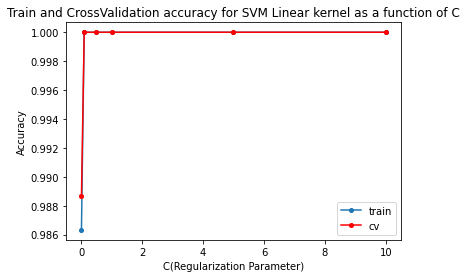

In [ ]:
c=[0.01,0.1,0.5,1,5,10]
train_cv_plot(c,s1_linear_train,s1_linear_test)

In [ ]:
# Rbf kernal
model_linear = SVC(kernel='rbf', C=0.01)
score_1_rbf = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='rbf', C=0.1)
score_2_rbf = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='rbf', C=0.5)
score_3_rbf = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='rbf', C=1)
score_4_rbf = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='rbf', C=5)
score_5_rbf = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='rbf', C=50)
score_6_rbf = validation(model_linear, X_train, y_train)


In [ ]:
score_1_rbf=pd.DataFrame.from_dict(score_1_rbf)
score_2_rbf=pd.DataFrame.from_dict(score_2_rbf)
score_3_rbf=pd.DataFrame.from_dict(score_3_rbf)
score_4_rbf=pd.DataFrame.from_dict(score_4_rbf)
score_5_rbf=pd.DataFrame.from_dict(score_5_rbf)
score_6_rbf=pd.DataFrame.from_dict(score_6_rbf)

In [ ]:
score_2_rbf

,fit_time,score_time,test_score,train_score
0,0.000855,0.000385,1.0,1.0
1,0.000834,0.000381,1.0,1.0
2,0.000816,0.000376,1.0,1.0
3,0.000857,0.000390,1.0,1.0
4,0.000827,0.000398,1.0,1.0
5,0.000831,0.000374,1.0,1.0
6,0.000828,0.000373,1.0,1.0
7,0.000871,0.000378,1.0,1.0


In [ ]:
s1_rbf_train=[score_1_rbf[['train_score']].mean(axis=0),score_2_rbf[['train_score']].mean(axis=0),
                score_3_rbf[['train_score']].mean(axis=0),score_4_rbf[['train_score']].mean(axis=0),
                score_5_rbf[['train_score']].mean(axis=0),score_6_rbf[['train_score']].mean(axis=0)]  

s1_rbf_test=[score_1_rbf[['test_score']].mean(axis=0),score_2_rbf[['test_score']].mean(axis=0),
                score_3_rbf[['test_score']].mean(axis=0),score_4_rbf[['test_score']].mean(axis=0),
                score_5_rbf[['test_score']].mean(axis=0),score_6_rbf[['test_score']].mean(axis=0)]

In [ ]:
## Learning curve for Train and Test accuracy for Linear SVM function for various values of C
def train_cv_plot_rbf(c,s1_linear_train,s1_linear_test):
    plt.plot(c,s1_linear_train,label='train',marker='o',markersize=4)
    plt.plot(c,s1_linear_test,label='cv',c='r',marker='o',markersize=4)
#     plot.set_xlabel("C(Regularization Parameter)", fontsize = 12)
    plt.xlabel("C(Regularization Parameter)")
    plt.ylabel("Accuracy")
#     plot1.set_title('Accuracy', fontsize = 16)
    plt.legend(loc='best')
    plt.title("Train and CrossValidation accuracy for SVM RBf kernel as a function of C")

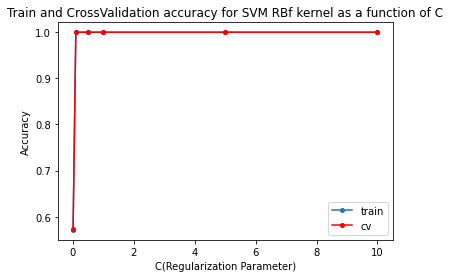

In [ ]:
c=[0.01,0.1,0.5,1,5,10]
train_cv_plot_rbf(c,s1_rbf_train,s1_rbf_test)

In [ ]:
model_linear = SVC(kernel='sigmoid', C=0.001)
score_1_sig = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='sigmoid', C=0.003)
score_2_sig = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='sigmoid', C=0.005)
score_3_sig = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='sigmoid', C=0.01)
score_4_sig = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='sigmoid', C=0.05)
score_5_sig = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='sigmoid', C=1)
score_6_sig = validation(model_linear, X_train, y_train)
model_linear = SVC(kernel='sigmoid', C=5)
score_7_sig = validation(model_linear, X_train, y_train)

In [ ]:
score_1_sig=pd.DataFrame.from_dict(score_1_sig)
score_2_sig=pd.DataFrame.from_dict(score_2_sig)
score_3_sig=pd.DataFrame.from_dict(score_3_sig)
score_4_sig=pd.DataFrame.from_dict(score_4_sig)
score_5_sig=pd.DataFrame.from_dict(score_5_sig)
score_6_sig=pd.DataFrame.from_dict(score_6_sig)
score_7_sig=pd.DataFrame.from_dict(score_7_sig)

In [ ]:
s1_sig_train=[score_1_sig[['train_score']].mean(axis=0),score_2_sig[['train_score']].mean(axis=0),
                score_3_sig[['train_score']].mean(axis=0),score_4_sig[['train_score']].mean(axis=0),
                score_5_sig[['train_score']].mean(axis=0),score_6_sig[['train_score']].mean(axis=0),score_7_sig[['train_score']].mean(axis=0)]  

s1_sig_test=[score_1_sig[['test_score']].mean(axis=0),score_2_sig[['test_score']].mean(axis=0),
                score_3_sig[['test_score']].mean(axis=0),score_4_sig[['test_score']].mean(axis=0),
                score_5_sig[['test_score']].mean(axis=0),score_6_sig[['test_score']].mean(axis=0),score_7_sig[['test_score']].mean(axis=0)]

In [ ]:
## Learning curve for Train and Test accuracy for Linear SVM function for various values of C
def train_cv_plot_sig(c,s1_linear_train,s1_linear_test):
    plt.plot(c,s1_linear_train,label='train',marker='o',markersize=4)
    plt.plot(c,s1_linear_test,label='cv',c='r',marker='o',markersize=4)
#     plot.set_xlabel("C(Regularization Parameter)", fontsize = 12)
    plt.xlabel("C(Regularization Parameter)")
    plt.ylabel("Accuracy")
#     plot1.set_title('Accuracy', fontsize = 16)
    plt.legend(loc='best')
    plt.title("Train and CrossValidation accuracy for SVM Sigmoid kernel as a function of C")

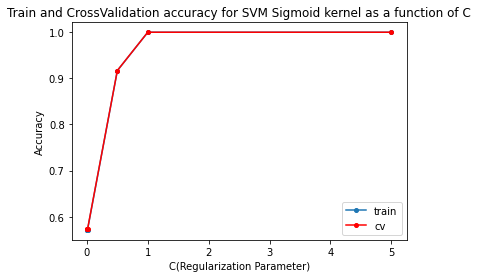

In [ ]:
c=[0.001,0.003,0.005,0.01,0.5,1,5]
train_cv_plot_sig(c,s1_sig_train,s1_sig_test)

In [ ]:
#### Fitting the functions on the complete training set with best parameters
## SVM Functions 
clf_linear_1 = svm.SVC(kernel='linear', C=0.1)
clf_linear_1.fit(X_train,y_train)

clf_rbf_1 = svm.SVC(kernel='rbf', C=0.1)
clf_rbf_1.fit(X_train,y_train)

clf_sigmoid_1 = svm.SVC(kernel='sigmoid', C=0.003)
clf_sigmoid_1.fit(X_train,y_train)

SVC(C=0.003, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred_linear=clf_linear_1.predict(X_test)
y_pred_rbf=clf_rbf_1.predict(X_test)
y_pred_sigmoid=clf_sigmoid_1.predict(X_test)

In [ ]:
## Classification report for SVM-Linear
print(confusion_matrix(y_test,y_pred_linear))  
print(classification_report(y_test,y_pred_linear))
print(accuracy_score(y_test,y_pred_linear))

[[22  0]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        14

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

1.0


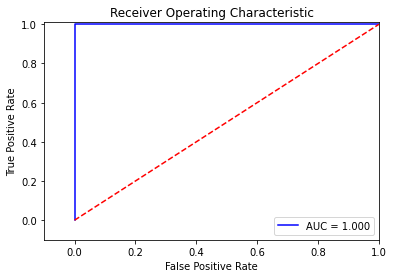

In [ ]:
roc_auc(y_pred_linear,y_test)

In [ ]:
## Classification report for SVM-rbf
print(confusion_matrix(y_test,y_pred_rbf))  
print(classification_report(y_test,y_pred_rbf))
print(accuracy_score(y_test,y_pred_rbf))

[[22  0]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        14

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

1.0


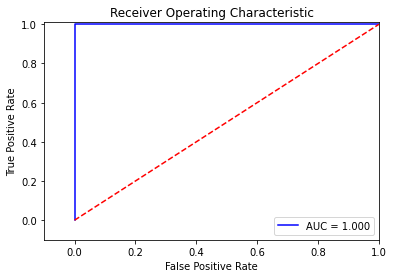

In [ ]:
roc_auc(y_pred_rbf,y_test)

In [ ]:
## Classification report for SVM-sigmoid
print(confusion_matrix(y_test,y_pred_sigmoid))  
print(classification_report(y_test,y_pred_sigmoid))
print(accuracy_score(y_test,y_pred_sigmoid))

[[22  0]
 [14  0]]
              precision    recall  f1-score   support

           0       0.61      1.00      0.76        22
           1       0.00      0.00      0.00        14

    accuracy                           0.61        36
   macro avg       0.31      0.50      0.38        36
weighted avg       0.37      0.61      0.46        36

0.6111111111111112


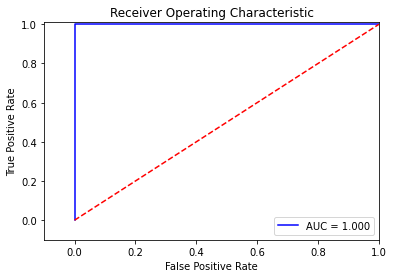

In [ ]:
roc_auc(y_pred_rbf,y_test)

In [ ]:
# Decision Tree
def train_using_gini(X_train, y_train, depth): 
  
    clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 42,max_depth=depth) 
  
    clf_gini.fit(X_train, y_train) #training
    return clf_gini

In [ ]:
def prediction(X_test, clf_object): 
  
    y_pred_tree = clf_object.predict(X_test)  
    return y_pred_tree

In [ ]:
def accuracy(y_test, y_pred): 
      
    print("Confusion Matrix is: ",confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy Score is: ", accuracy_score(y_test,y_pred)*100) 
      
    print("Classsification Report is: ", classification_report(y_test, y_pred))

In [ ]:
CC_alpha=[0.00001,0.0001,0.001,0.01,0.05,0.1,0.4]
model_linear = DecisionTreeClassifier(criterion = "gini", 
            random_state = 42,ccp_alpha=0.00001)
score_1_dt = validation(model_linear, X_train, y_train)
model_linear = DecisionTreeClassifier(criterion = "gini", 
            random_state = 42,ccp_alpha=0.0001)
score_2_dt = validation(model_linear, X_train, y_train)


model_linear = DecisionTreeClassifier(criterion = "gini", 
            random_state = 42,ccp_alpha=0.001)
score_3_dt = validation(model_linear, X_train, y_train)
model_linear = DecisionTreeClassifier(criterion = "gini", 
            random_state = 42,ccp_alpha=0.01)
score_4_dt = validation(model_linear, X_train, y_train)
model_linear = DecisionTreeClassifier(criterion = "gini", 
            random_state = 42,ccp_alpha=0.05)
score_5_dt = validation(model_linear, X_train, y_train)
model_linear = DecisionTreeClassifier(criterion = "gini", 
            random_state = 42,ccp_alpha=0.1)
score_6_dt = validation(model_linear, X_train, y_train)
model_linear = DecisionTreeClassifier(criterion = "gini", 
            random_state = 42,ccp_alpha=0.4)
score_7_dt = validation(model_linear, X_train, y_train)

In [ ]:
score_1_dt=pd.DataFrame.from_dict(score_1_dt)
score_2_dt=pd.DataFrame.from_dict(score_2_dt)
score_3_dt=pd.DataFrame.from_dict(score_3_dt)
score_4_dt=pd.DataFrame.from_dict(score_4_dt)
score_5_dt=pd.DataFrame.from_dict(score_5_dt)
score_6_dt=pd.DataFrame.from_dict(score_6_dt)
score_7_dt=pd.DataFrame.from_dict(score_7_dt)

In [ ]:
score_2_dt

,fit_time,score_time,test_score,train_score
0,0.001004,0.000357,1.0,1.0
1,0.001001,0.000355,1.0,1.0
2,0.000992,0.000379,1.0,1.0
3,0.000933,0.000382,1.0,1.0
4,0.000946,0.000480,1.0,1.0
5,0.000985,0.000334,0.9,1.0
6,0.000931,0.000348,1.0,1.0
7,0.000934,0.000355,0.9,1.0


In [ ]:
s1_dt_train=[score_1_dt[['train_score']].mean(axis=0),score_2_dt[['train_score']].mean(axis=0),
                score_3_dt[['train_score']].mean(axis=0),score_4_dt[['train_score']].mean(axis=0),
                score_5_dt[['train_score']].mean(axis=0),score_6_dt[['train_score']].mean(axis=0),score_7_dt[['train_score']].mean(axis=0)]  

s1_dt_test=[score_1_dt[['test_score']].mean(axis=0),score_2_dt[['test_score']].mean(axis=0),
                score_3_dt[['test_score']].mean(axis=0),score_4_dt[['test_score']].mean(axis=0),
                score_5_dt[['test_score']].mean(axis=0),score_6_dt[['test_score']].mean(axis=0),score_7_dt[['test_score']].mean(axis=0)]

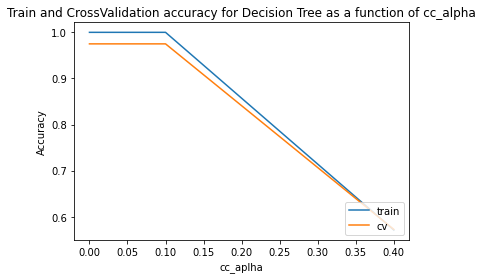

In [ ]:
CC_alpha=[0.00001,0.0001,0.001,0.01,0.05,0.1,0.4]
def train_cv_plot_dt(c,s1_linear_train,s1_linear_test):
    plt.plot(c,s1_linear_train,label='train')
    plt.plot(c,s1_linear_test,label='cv')
    plt.xlabel("cc_aplha")
    plt.ylabel("Accuracy")
    plt.legend(loc='lower right')
    plt.title("Train and CrossValidation accuracy for Decision Tree as a function of cc_alpha")
train_cv_plot_dt(CC_alpha,s1_dt_train,s1_dt_test)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100)
clf_gini.fit(X_train, y_train) 
y_pred_tree = prediction(X_test, clf_gini)
print(accuracy(y_test, y_pred_tree))

print(clf_gini.tree_.max_depth)
# clf.gin

Confusion Matrix is:  [[22  0]
 [ 0 14]]
Accuracy Score is:  100.0
Classsification Report is:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        14

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

None
2


In [ ]:
print("Accuracy on training set:",clf_gini.score(X_train, y_train)*100)
print("Accuracy on test set:",clf_gini.score(X_test, y_test)*100)

Accuracy on training set: 100.0
Accuracy on test set: 100.0


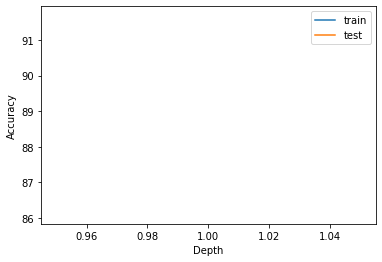

In [ ]:
test_accuracy = []
train_accuracy = []
depth = []
for i in range(1,clf_gini.tree_.max_depth):
    clf_gini_1 = train_using_gini(X_train, y_train, i)
    y_pred_tree_test = prediction(X_test, clf_gini_1)
    y_pred_tree_train = prediction(X_train, clf_gini_1)
    test_accuracy.append(accuracy_score(y_test,y_pred_tree_test)*100)
    train_accuracy.append(accuracy_score(y_train,y_pred_tree_train)*100)
    depth.append(i)
    
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.plot(depth,train_accuracy, label='train')
plt.plot(depth,test_accuracy, label='test')
plt.legend(loc='best')
plt.show()

In [ ]:
print("Accuracy on training set:",clf_gini.score(X_train, y_train)*100)
print("Accuracy on test set:",clf_gini.score(X_test, y_test)*100)

Accuracy on training set: 100.0
Accuracy on test set: 100.0


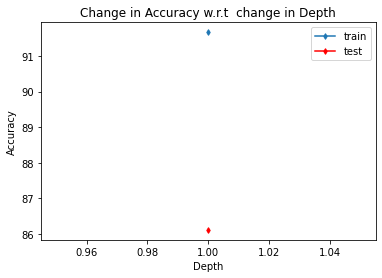

In [ ]:
test_accuracy = []
train_accuracy = []
depth = []
for i in range(1,clf_gini.tree_.max_depth):
    clf_gini_1 = train_using_gini(X_train, y_train, i)
    y_pred_tree_test = prediction(X_test, clf_gini_1)
    y_pred_tree_train = prediction(X_train, clf_gini_1)
    test_accuracy.append(accuracy_score(y_test,y_pred_tree_test)*100)
    train_accuracy.append(accuracy_score(y_train,y_pred_tree_train)*100)
    depth.append(i)
    
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.plot(depth,train_accuracy, label='train',marker='d',markersize=4)
plt.plot(depth,test_accuracy, label='test',marker='d',markersize=4,color='r')
plt.title("Change in Accuracy w.r.t  change in Depth")
plt.legend(loc='best')
plt.show()

In [ ]:
X_test.shape

(36, 7)

In [ ]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=8)
clf_gini.fit(X_train, y_train) 
y_pred_tree = prediction(X_test, clf_gini)
accuracy(y_test, y_pred_tree)

Confusion Matrix is:  [[22  0]
 [ 0 14]]
Accuracy Score is:  100.0
Classsification Report is:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        14

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [ ]:
CC_alpha=[0.0000001,0.000001,0.00001,0.0001,0.001,0.01,0.1]
model_linear = DecisionTreeClassifier(criterion = "gini", 
            random_state = 42,ccp_alpha=0.0000001,max_depth=2)
score_1_dt = validation(model_linear, X_train, y_train)
model_linear = DecisionTreeClassifier(criterion = "gini", 
            random_state = 42,ccp_alpha=0.000001,max_depth=2)
score_2_dt = validation(model_linear, X_train, y_train)


model_linear = DecisionTreeClassifier(criterion = "gini", 
            random_state = 42,ccp_alpha=0.00001,max_depth=2)
score_3_dt = validation(model_linear, X_train, y_train)
model_linear = DecisionTreeClassifier(criterion = "gini", 
            random_state = 42,ccp_alpha=0.0001,max_depth=2)
score_4_dt = validation(model_linear, X_train, y_train)
model_linear = DecisionTreeClassifier(criterion = "gini", 
            random_state = 42,ccp_alpha=0.001,max_depth=2)
score_5_dt = validation(model_linear, X_train, y_train)
model_linear = DecisionTreeClassifier(criterion = "gini", 
            random_state = 42,ccp_alpha=0.01,max_depth=2)
score_6_dt = validation(model_linear, X_train, y_train)
model_linear = DecisionTreeClassifier(criterion = "gini", 
            random_state = 42,ccp_alpha=0.05,max_depth=2)
score_7_dt = validation(model_linear, X_train, y_train)

In [ ]:
score_1_dt=pd.DataFrame.from_dict(score_1_dt)
score_2_dt=pd.DataFrame.from_dict(score_2_dt)
score_3_dt=pd.DataFrame.from_dict(score_3_dt)
score_4_dt=pd.DataFrame.from_dict(score_4_dt)
score_5_dt=pd.DataFrame.from_dict(score_5_dt)
score_6_dt=pd.DataFrame.from_dict(score_6_dt)
score_7_dt=pd.DataFrame.from_dict(score_7_dt)

In [ ]:
score_2_dt

,fit_time,score_time,test_score,train_score
0,0.000943,0.000375,1.0,1.0
1,0.000963,0.000317,1.0,1.0
2,0.000915,0.000446,1.0,1.0
3,0.000898,0.000340,1.0,1.0
4,0.000866,0.000369,1.0,1.0
5,0.000914,0.000364,0.9,1.0
6,0.000933,0.000374,1.0,1.0
7,0.000874,0.000329,0.9,1.0


In [ ]:
s1_dt_train=[score_1_dt[['train_score']].mean(axis=0),score_2_dt[['train_score']].mean(axis=0),
                score_3_dt[['train_score']].mean(axis=0),score_4_dt[['train_score']].mean(axis=0),score_5_dt[['train_score']].mean(axis=0),
            score_6_dt[['train_score']].mean(axis=0),score_7_dt[['train_score']].mean(axis=0)]  

s1_dt_test=[score_1_dt[['test_score']].mean(axis=0),score_2_dt[['test_score']].mean(axis=0),
                score_3_dt[['test_score']].mean(axis=0),score_4_dt[['test_score']].mean(axis=0),score_5_dt[['test_score']].mean(axis=0),
           score_6_dt[['test_score']].mean(axis=0),score_7_dt[['test_score']].mean(axis=0)]

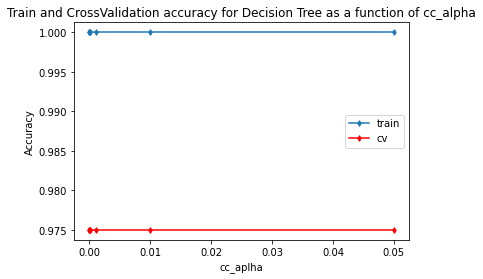

In [ ]:
CC_alpha=[0.0000001,0.000001,0.00001,0.0001,0.001,0.01,0.05]
def train_cv_plot_dt(c,s1_linear_train,s1_linear_test):
    plt.plot(c,s1_linear_train,label='train',marker='d',markersize=4)
    plt.plot(c,s1_linear_test,label='cv',marker='d',markersize=4,color='r')
    plt.xlabel("cc_aplha")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.title("Train and CrossValidation accuracy for Decision Tree as a function of cc_alpha")
train_cv_plot_dt(CC_alpha,s1_dt_train,s1_dt_test)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
C=[0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.01,0.05]
tree_depth=[]
tree_acc=[]
# for i in CC_alpha:
#     clf_gini1 = DecisionTreeClassifier(criterion = "gini", random_state = 42,ccp_alpha=i)
#     clf_gini_.fit(X_train, y_train)
#     y1_pred_tree = prediction(X_test, clf_gini)
#     print(accuracy(y_test, y_pred_tree))
# #     print(clf_gini1.tree_.max_depth)
#     ccp_alpha_list.append(clf_gini1)
for i in C:
    clf_gini_ = DecisionTreeClassifier(criterion = "gini", random_state = 100,ccp_alpha=i,max_depth=2)
    clf_gini_.fit(X_train, y_train) 
    y1_pred_tree = prediction(X_test, clf_gini)
    tree_acc.append(accuracy(y_test, y_pred_tree))
    tree_depth.append(clf_gini_.tree_.max_depth)

Confusion Matrix is:  [[22  0]
 [ 0 14]]
Accuracy Score is:  100.0
Classsification Report is:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        14

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Confusion Matrix is:  [[22  0]
 [ 0 14]]
Accuracy Score is:  100.0
Classsification Report is:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        14

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Confusion Matrix is:  [[22  0]
 [ 0 14]]
Accuracy Score is:  100.0
Classsification Report is:                precision    recall  f1-score   support

      

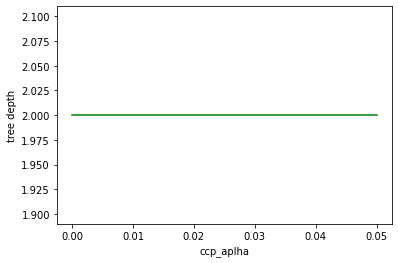

In [ ]:
plt.plot(C,tree_depth,c='g')
plt.xlabel('ccp_aplha')
plt.ylabel('tree depth')
plt.show()

In [ ]:
clf_gini_ = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=2,ccp_alpha=0.00001)
clf_gini_.fit(X_train, y_train) 
y1_pred_tree = prediction(X_test, clf_gini)
print(accuracy(y_test, y_pred_tree))

# print(clf_gini_.tree_.max_depth)
# clf.gin

Confusion Matrix is:  [[22  0]
 [ 0 14]]
Accuracy Score is:  100.0
Classsification Report is:                precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        14

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

None


In [ ]:
print("Accuracy on training set:",clf_gini.score(X_train, y_train)*100)
print("Accuracy on test set:",clf_gini.score(X_test, y_test)*100)

Accuracy on training set: 100.0
Accuracy on test set: 100.0


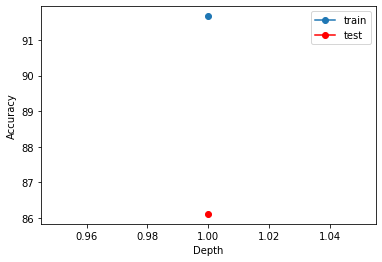

In [ ]:
test_accuracy = []
train_accuracy = []
depth = []
for i in range(1,clf_gini.tree_.max_depth):
    clf_gini_1 = train_using_gini(X_train, y_train, i)
    y_pred_tree_test = prediction(X_test, clf_gini_1)
    y_pred_tree_train = prediction(X_train, clf_gini_1)
    test_accuracy.append(accuracy_score(y_test,y_pred_tree_test)*100)
    train_accuracy.append(accuracy_score(y_train,y_pred_tree_train)*100)
    depth.append(i)
    
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.plot(depth,train_accuracy, label='train',marker='o')
plt.plot(depth,test_accuracy, label='test',marker='o',color='r')
plt.legend(loc='best')
plt.show()

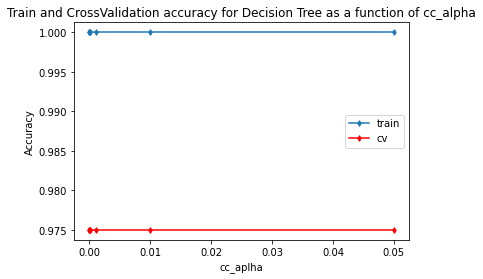

In [ ]:
CC_alpha=[0.0000001,0.000001,0.00001,0.0001,0.001,0.01,0.05]
def train_cv_plot_dt(c,s1_linear_train,s1_linear_test):
    plt.plot(c,s1_linear_train,label='train',marker='d',markersize=4)
    plt.plot(c,s1_linear_test,label='cv',marker='d',markersize=4,color='r')
    plt.xlabel("cc_aplha")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.title("Train and CrossValidation accuracy for Decision Tree as a function of cc_alpha")
train_cv_plot_dt(CC_alpha,s1_dt_train,s1_dt_test)